In [1]:
#recurrent neural network
# part-1 : data preprocessing 
# import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the training set

dataset_train = pd.read_csv("C:\\Users\\debad\\Downloads\\Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [3]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [5]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
training_set.shape

(1258, 1)

In [7]:
# creating a adata structure with 60 timesteps and 1 output

x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [9]:
# reshaping 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [11]:
# part-2: building and training the rnn
# importing the kers libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
# initialising the rnn

regressor = Sequential()

In [13]:
# adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [14]:
# adding a second LSTM layer and some Dropout regularisation

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
# adding a third LSTM layer and some Dropout regularisation

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [16]:
# adding a fourth LSTM layer and some Dropout regularisation

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [17]:
# adding the output layer
regressor.add(Dense(units=1))

In [18]:
# compiling the rnn
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [19]:
# fitting the rnn to training set

regressor.fit(x_train,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 56ms/step - loss: 0.0556
Epoch 2/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0056
Epoch 10/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0043
Epoch 13/100
38/38 [====

In [20]:
pred = regressor.predict(x_train)

38/38 [==============================] - 2s 19ms/step


In [21]:
pred

array([[0.06714945],
       [0.0691483 ],
       [0.0705303 ],
       ...,
       [0.953649  ],
       [0.9551104 ],
       [0.9526078 ]], dtype=float32)

In [22]:
# evaluating the rnn

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train,pred))

In [23]:
rmse

0.023907378792902875

In [24]:
# part-3 making the predictions and visualising the results

# getting the real stock price of 2017

dataset_test = pd.read_csv("C:\\Users\\debad\\Downloads\\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [25]:
# getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 32ms/step


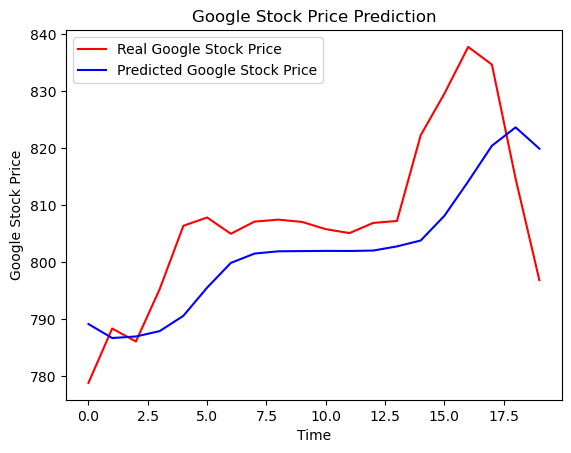

In [26]:
# visualising the result

plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()